<span style="font-family:Cambria; color:#c27767">Optional: install if required</span>

In [1]:
# Uncomment if required
# !pip install pandas --quiet
# !pip install geopy --quiet
# !pip install folium --quiet
# !pip install missingno --quiet

<span style="font-family:Cambria; color:#c27767">Required packages:</span>

In [2]:
# Standard library imports
import sys
import time

# Third party imports
from IPython.core.display import HTML

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from datetime import date

from geopy.geocoders import Nominatim
import folium

# Local application/library specific imports
sys.path.append('functions')

from find_lat_long import find_lat_long
from find_state import find_state
from prepare_rain_data import prepare_rain_data

<span style="font-family:Cambria; color:#c27767">Run below to lines for readability and style options:</span>

In [3]:
# To properly show HTML table
from IPython.core.display import HTML
table_css = 'table {align:left;display:block} '
HTML('<style>{}</style>'.format(table_css))

In [4]:
# Pandas - run to display Data Frames properly

# To limit displayed rows
pd.options.display.max_rows = 50

#  To show all columns
pd.options.display.max_columns = 100

# To round floating numbers
pd.options.display.float_format = '{:,.2f}'.format
# To unset rounding float numbers
# pd.set_option("display.float_format", None)

<span style="font-family:Cambria">

<span style="color:#c27767">
    
# Rain in Australia
</span>

Ever wondered if you should carry an umbrella tomorrow? With this dataset, you can predict next-day rain by training classification models on the target variable <code>RainTomorrow</code>.

This dataset comprises about 10 years of daily weather observations from numerous locations across Australia.

<code>RainTomorrow</code> is the target variable to predict. It answers the crucial question: <span style="color:#c27767">**will it rain the next day? (Yes or No).**</span>

---
**Data source:**  
<a href="https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package" title="Data source - Kaggle">Data source - Kaggle</a>  

The observations were gathered from a multitude of weather stations. Definitions have been adapted from the Bureau of Meteorology's Climate Data Online. Data source: Climate Data and Climate Data Online. Copyright Commonwealth of Australia 2010, Bureau of Meteorology.

**Useful links:**  

<a href="http://www.bom.gov.au/climate/dwo/" title="Daily Weather Observations in Australia">Daily Weather Observations in Australia</a>  
<a href="http://www.bom.gov.au/climate/data/" title="Australia Climate Data">Australia Climate Data</a>  
<a href="http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml" title="Notes to accompany Daily Weather Observations">Notes to accompany Daily Weather Observations</a>  
<a href="http://www.bom.gov.au/climate/cdo/about/about-stats.shtml" title="About Climate Statistics">About Climate Statistics</a>  

</span>

<span style="font-family:Cambria; color:#c27767">

## 1. Learn about Data Collection process and Problem Domain
</span>

<span style="font-family:Cambria">
    
First of all, I will try to examine variables present in the data set and think about any assumptions and issues within the data - whether highlighted in <a href="http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml" title="Notes to accompany Daily Weather Observations">Notes to accompany Daily Weather Observations</a> or not. I will also try to understand the domain problem and familiarise myself with meteorology.  

As per <a href="https://vdsbook.com" title="Veridical Data Science">book</a> recommendations, I will try Veridical Data Science approach and I will try to answer questions below:

1. What does each variable measure?
2. How the data was collected?
3. What are the observational units?  
4. Is the data relevant to my project?
5. What questions do I have, and what assumptions am I  making?

The questions above will be answered in following sections.  

---
</span>

<span style="font-family:Cambria; color:#c27767">

### 1.1. Variables
</span>

<span style="font-family:Cambria">

Data definition is given in the following site: <a href="http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml" title="Notes to accompany Daily Weather Observations">Notes to accompany Daily Weather Observations</a>. Instead of copy-paste the table, I will check the data file and write correct column names as it is present in the data file I downloaded. I created a copy of the file to make sure nothing will be changed and renamed the copy to *copy_weatherAUS.csv*. The table below was created by using online table creator tool: 
<a href="https://www.tablesgenerator.com/html_tables" title="Tables Generator">Tables Generator</a>.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-zapl{border-color:#963400;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-k1ns{border-color:#963400;text-align:left;vertical-align:top}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-zapl">Data type</th>
    <th class="tg-zapl">Column name</th>
    <th class="tg-zapl">Description</th>
    <th class="tg-zapl">Method</th>
    <th class="tg-zapl">Units</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-k1ns">Date</td>
    <td class="tg-k1ns">Date</td>
    <td class="tg-k1ns">Date in format yyyy-mm-dd.</td>
    <td class="tg-k1ns">-</td>
    <td class="tg-k1ns">-</td>
  </tr>
  <tr>
    <td class="tg-k1ns">Location</td>
    <td class="tg-k1ns">Location</td>
    <td class="tg-k1ns">Name of the weather station in a certain location.</td>
    <td class="tg-k1ns">-</td>
    <td class="tg-k1ns">-</td>
  </tr>
  <tr>
    <td class="tg-k1ns" rowspan="2">Temperature</td>
    <td class="tg-k1ns">MinTemp</td>
    <td class="tg-k1ns">Minimum temperature in the 24 hours to 9 AM.</td>
    <td class="tg-k1ns" rowspan="2">To take temperature measurements, thermometers are placed inside instrument enclosures known as a Stevenson screen. Stevenson screen is basically a box with louvres that allow air to circulate around the thermometer inside while protecting it from outside elements like rain and direct sunlight. The outside is painted white to minimise heat absorption. This basic design has been around for about 150 years, and is used by most meteorological organisations around the world. Traditionally, trained observers would read the thermometer and send in the observations at least twice a day—normally at 9 am and 3 pm; but these days we have automatic thermometers that send in the information electronically. Source: <a href="https://media.bom.gov.au/social/blog/916/ask-the-bureau-how-is-temperature-measured/" title="Ask the Bureau: How is temperature measured?">Ask the Bureau: How is temperature measured?</a></td>
    <td class="tg-k1ns" rowspan="2">Degrees Celsius</td>
  </tr>
  <tr>
    <td class="tg-k1ns">MaxTemp</td>
    <td class="tg-k1ns">Maximum temperature in the 24 hours to 9 AM.</td>
  </tr>
  <tr>
    <td class="tg-k1ns">Rainfall</td>
    <td class="tg-k1ns">Rainfall</td>
    <td class="tg-k1ns">Precipitation (rain that falls to or condenses on the ground) in the 24 hours to 9 AM.</td>
    <td class="tg-k1ns">Mostly rain, but also can be present as snow. There are both manual rain gauge and automatic rain gauge. The first one need to be emptied by someone, while second one is used in automatic weather stations. Where snow is present, snow gauge is used, which automatically melts the snow. Nominally the rainfall is observed at 9 AM, but in a number of stations the number can be reported in 48 or 72 hours (or even longer) if it is a weekend or observer is not present. These are known as accumulated observations. At the vast majority of rainfall sites observations are taken by volunteers. Sources: <a href="http://www.bom.gov.au/climate/cdo/about/definitionsrain.shtml" title="Definitions for rainfall">Definitions for rainfall</a>, <a href="http://www.bom.gov.au/climate/cdo/about/about-rain-data.shtml" title="About rainfall">About rainfall</a>.</td>
    <td class="tg-k1ns">Millimetres</td>
  </tr>
  <tr>
    <td class="tg-k1ns">Evaporation</td>
    <td class="tg-k1ns">Evaporation</td>
    <td class="tg-k1ns">"Class A" evaporation pan in the 24 hours to 9 AM.</td>
    <td class="tg-k1ns">Evaporation is measured daily as the depth of water (in inches) evaporates from the pan. The measurement day begins with the pan filled to exactly two inches (5 cm) from the pan top. At the end of 24 hours, the amount of water to refill the pan to exactly two inches from its top is measured. Basically evaporation is the amount of water which evaporates from an open pan called a Class A evaporation pan. The rate of evaporation depends on factors such as cloudiness, air temperature and wind speed. Areas in central Australia are very dry, and therefore have a high rate of evaporation. In contrast, coastal areas tend to have a lower evaporation rate as a result of their proximity to a large water source. Areas with low rainfall and low humidity tend to have a high evaporation rate, whilst areas with high rainfall and high humidity tend to have a low evaporation rate. Regarding measurement errors, it is noted that: "The Class A Evaporation Pan is of limited use on days with rainfall events of >30mm. The most common and obvious error is in daily rainfall events of >55mm (203mm rain gauge) where the Class A Evaporation pan will likely overflow." Sources: <a href="http://www.bom.gov.au/watl/evaporation/" title="Evaporation: Average Monthly & Annual Evaporation">Evaporation: Average Monthly & Annual Evaporation</a>, <a href="http://www.bom.gov.au/climate/cdo/about/definitionsother.shtml" title="Climate statistics for Australian locations">Climate statistics for Australian locations</a>, <a href="https://en.wikipedia.org/wiki/Pan_evaporation#:~:text=Class%20A%20evaporation%20pan,-In%20the%20United&text=Evaporation%20is%20measured%20daily%20as,from%20its%20top%20is%20measured." title="Pan evaporation">Pan evaporation - Wikipedia</a>, <a href="http://www.bom.gov.au/climate/maps/averages/evaporation/" title="Average annual, monthly and seasonal evaporation">Average annual, monthly and seasonal evaporation</a></td>
    <td class="tg-k1ns">Millimetres</td>
  </tr>
  <tr>
    <td class="tg-k1ns">Sunshine</td>
    <td class="tg-k1ns">Sunshine</td>
    <td class="tg-k1ns">Bright sunshine in the 24 hours to midnight.</td>
    <td class="tg-k1ns">Average number of hours of bright sunshine each day in a calendar month or year, calculated over the period of record. Hours of bright sunshine is measured from midnight to midnight. Within the Bureau of Meteorology network bright sunshine has generally been recorded with a Campbell-Stokes recorder. This device only measures the duration of “bright” sunshine, which is less than the amount of “visible” sunshine. For example, sunshine immediately after sunrise and just before sunset is visible, but would not be bright enough to register on the Campbell-Stokes recorder. Source: <a href="http://www.bom.gov.au/climate/cdo/about/definitionsother.shtml" title="Climate statistics for Australian locations">Climate statistics for Australian locations</a>.</td>
    <td class="tg-k1ns">Hours</td>
  </tr>
  <tr>
    <td class="tg-k1ns" rowspan="2">Wind Gust</td>
    <td class="tg-k1ns">WindGustDir</td>
    <td class="tg-k1ns">Direction of the strongest wind gust in the 24 hours to midnight.</td>
    <td class="tg-k1ns" rowspan="2">A gust is any sudden increase of wind speed of short duration; typically a 3 second time period is used. The maximum wind gust for a day is measured from midnight to midnight. If, for some reason, an observation is unable to be made, the next observation is recorded as an accumulation. Accumulated data can affect the Date of the Maximum Wind Gust, since the exact date of occurrence is unknown. Source: <a href="http://www.bom.gov.au/climate/cdo/about/definitionsother.shtml" title="Climate statistics for Australian locations">Climate statistics for Australian locations</a> </td>
    <td class="tg-k1ns">16 compass points</td>
  </tr>
  <tr>
    <td class="tg-k1ns">WindGustSpeed</td>
    <td class="tg-k1ns">Speed of strongest wind gust in the 24 hours to midnight.</td>
    <td class="tg-k1ns">Kilometres per hour</td>
  </tr>
  <tr>
    <td class="tg-k1ns" rowspan="6">9 AM measurements</td>
    <td class="tg-k1ns">Temp9am</td>
    <td class="tg-k1ns">Temperature at 9 AM.</td>
    <td class="tg-k1ns">Already explained above (see Temperature row).</td>
    <td class="tg-k1ns">Degrees Celsius</td>
  </tr>
  <tr>
    <td class="tg-k1ns">Humidity9am</td>
    <td class="tg-k1ns">Relative humidity at 9 AM.</td>
    <td class="tg-k1ns">Relative Humidity is the percentage ratio of Vapour Pressure and Saturation Vapour Pressure. It is commonly used indicator of the moisture in the air. Relative humidity (RH) is the amount of moisture in the air as a percentage of the amount the air can actually hold. Warmer air can hold more moisture than cooler air, which means that for a given amount of atmospheric moisture, RH will be lower if air is warm than it would be if the air is cool. This can be seen by comparing the daily 9am maps (higher RH values) with the daily 3pm maps (lower RH values) for any month of the year. Sources: <a href="http://www.bom.gov.au/climate/maps/averages/relative-humidity/files/calc-rh.pdf" title="Calculation of Relative Humidity">Calculation of Relative Humidity</a>, <a href="http://www.bom.gov.au/climate/maps/averages/relative-humidity/" title="Average 9 am and 3 pm relative humidity">Average 9 am and 3 pm relative humidity</a>.</td>
    <td class="tg-k1ns">Percent</td>
  </tr>
  <tr>
    <td class="tg-k1ns">WindDir9am</td>
    <td class="tg-k1ns">Wind direction averaged over 10 minutes prior to 9AM.</td>
    <td class="tg-k1ns" rowspan="2">Wind is one of the most highly variable meteorological elements, both in speed and direction. It is influenced by a wide range of factors, from large scale pressure patterns, to the time of day and the nature of the surrounding terrain. Because the wind is highly variable it is often studied by means of frequency analyses, provided here in the form of wind roses, rather than as simple averages. The wind direction is specified relative to true (geographic) north, and <strong>is the direction from which the wind is blowing</strong>. The direction can be specified either as the number of degrees clockwise from true north, or as one of the 8 or 16 compass points - as per given metadata, 16 compass points are used. Wind speeds are 10-minute average wind speeds unless specifically labelled as gusts, in which case they are an almost instantaneous reading. <a href="http://www.bom.gov.au/climate/averages/wind/wind_rose.shtml" title="Wind Roses">Wind Roses</a> are used to visualise wind drirection and speed.</td>
    <td class="tg-k1ns">Compass points</td>
  </tr>
  <tr>
    <td class="tg-k1ns">WindSpeed9am</td>
    <td class="tg-k1ns">Wind speed averaged over 10 minutes prior to 9 AM.</td>
    <td class="tg-k1ns">Kilometres per hour</td>
  </tr>
  <tr>
    <td class="tg-k1ns">Cloud9am</td>
    <td class="tg-k1ns">Fraction of sky obscured by cloud at 9 AM.</td>
    <td class="tg-k1ns">The total cloud amount is measured visually by estimating the fraction (in eighths or oktas) of the dome of the sky covered by clouds. A completely clear sky is recorded as zero okta, while a totally overcast sky is recorded as 8 oktas. The presence of any trace of cloud in an otherwise blue sky is recorded as 1 okta, and similarly any trace of blue in an otherwise cloudy sky is recorded as 7 oktas; 9 oktas represents sky obscured by fog or other meteorological phenomena. Areas of inland Australia have a lower moisture content in the air and therefore less cloud cover. Coastal areas have a higher moisture content therefore greater and more frequent cloud cover. Sources: <a href="http://www.bom.gov.au/climate/maps/averages/cloud/" title="Average 9 am and 3 pm cloud">Average 9 am and 3 pm cloud</a>, <a href="https://weather.metoffice.gov.uk/guides/observations/how-we-measure-cloud#:~:text=1%20okta%20represents%20a%20cloud,fog%20or%20other%20meteorological%20phenomena" title="How we measure cloud - Met Office">How we measure cloud - Met Office</a>.</td>
    <td class="tg-k1ns">Eights (oktas)</td>
  </tr>
  <tr>
    <td class="tg-k1ns">Pressure9am</td>
    <td class="tg-k1ns">Atmospheric pressure reduced to mean sea level at 9 AM.</td>
    <td class="tg-k1ns">The mean sea-level pressure (MSLP) is the atmospheric pressure at mean sea level. This is the atmospheric pressure normally given in weather reports on radio, television, and newspapers or on the internet. Average sea-level pressure is 1,013.25 hPa. The lowest measurable sea-level pressure is found at the centres of tropical cyclones and tornadoes, with a record low of 870 hPa. The highest sea-level pressure on Earth occurs in Siberia, where the Siberian High often attains a sea-level pressure above 1,050 hPa. A mean sea level pressure chart shows the direct relationship between isobar spacing (pressure gradient) and orientation, and the strength and direction of surface winds. The general rule is that winds are strongest where the isobars are closest together. Thus the strongest winds are usually experienced near cold fronts, low pressure systems and in westerly airstreams south of the continent. Winds are normally light near high pressure systems where the isobars are widely spaced. Sources: <a href="https://en.wikipedia.org/wiki/Atmospheric_pressure" title="Atmospheric pressure - Wikipedia">Atmospheric pressure - Wikipedia</a>, <a href="http://www.bom.gov.au/australia/charts/Interpreting_MSLP.shtml" title="Interpreting the Mean Sea Level Pressure (MSLP) Analysis">Interpreting the Mean Sea Level Pressure (MSLP) Analysis</a>.</td>
    <td class="tg-k1ns">Hectopascals</td>
  </tr>
  <tr>
    <td class="tg-k1ns" rowspan="6">3 PM measurements</td>
    <td class="tg-k1ns">Temp3pm</td>
    <td class="tg-k1ns">Temperature at 3 Pm.</td>
    <td class="tg-k1ns">Already explained above (see Temperature row).</td>
    <td class="tg-k1ns">Degrees Celsius</td>
  </tr>
  <tr>
    <td class="tg-k1ns">Humidity3pm</td>
    <td class="tg-k1ns">Relative humidity at 3 PM.</td>
    <td class="tg-k1ns">Already explained above - please see 9 AM measurements - Humidity.</td>
    <td class="tg-k1ns">Percent</td>
  </tr>
  <tr>
    <td class="tg-k1ns">WindDir3pm</td>
    <td class="tg-k1ns">Wind direction averaged over 10 minutes prior 3 PM.</td>
    <td class="tg-k1ns" rowspan="2">Already explained above - please see 9 AM measurements - Wind.</td>
    <td class="tg-k1ns">Compass points</td>
  </tr>
  <tr>
    <td class="tg-k1ns">WindSpeed3pm</td>
    <td class="tg-k1ns">Wind speed averaged over 10 minutes prior 3 PM.</td>
    <td class="tg-k1ns">Kilometres per hour</td>
  </tr>
  <tr>
    <td class="tg-k1ns">Cloud3pm</td>
    <td class="tg-k1ns">Fraction of sky obscured by cloud at 3 PM.</td>
    <td class="tg-k1ns">Already explained above - please see 9 AM measurements - Cloud.</td>
    <td class="tg-k1ns">Eights (oktas)</td>
  </tr>
  <tr>
    <td class="tg-k1ns">Pressure3pm</td>
    <td class="tg-k1ns">Atmospheric pressure reduced to mean sea level at 3 PM.</td>
    <td class="tg-k1ns">Already explained above - please see 9 AM measurements - Pressure.</td>
    <td class="tg-k1ns">Hectopascals</td>
  </tr>
  <tr>
    <td class="tg-k1ns" rowspan="2">Rainfall classification</td>
    <td class="tg-k1ns">RainToday</td>
    <td class="tg-k1ns">Calculated field - feature.</td>
    <td class="tg-k1ns">Boolean: 1 if precipitation (mm) in the 24 hours to 9 AM exceeds 1mm, otherwise 0.</td>
    <td class="tg-k1ns">Boolean</td>
  </tr>
  <tr>
    <td class="tg-k1ns">RainTomorrow</td>
    <td class="tg-k1ns">Calculated field - feature.</td>
    <td class="tg-k1ns">Boolean: 1 if precipitation (mm) the next day exceeds 1mm, otherwise 0. Used to create Responsible Variable.</td>
    <td class="tg-k1ns">Boolean</td>
  </tr>
</tbody></table>

<span style="font-family:Cambria">
    
Just by briefly looking into the data set, using some quick filters in Excel and quick Google checks, I can add the below:

<strong style="color:#c27767">Date:</strong> The dataset has observations from 01/11/2007 till 25/06/2017.  

<strong style="color:#c27767">Locations:</strong> The observations are taken from 49 different locations. All names looks unique; I quickly searched for a few places to make sure they exist (PearceRaaf). I also noticed location names are not "user friendly": the mentioned <code>PearceRAAF</code> is actually RAAF Base Pearce, a military base. What I mean is that if I would want to map all these locations to a visible map, I would need to re-write the names to actual location names, for example update <code>BadgerysCreek</code> to <code>Badgerys Creek</code>. Such updates are minor ones.

<strong style="color:#c27767">Temperature:</strong> just by looking into temperature fields I was not able to see any extremes and non-existant values; maximum temperatures are in the range of -4.8 to 48.1; minimum temperatures are from -8.5 to 33.9. 9 AM and 3 PM temperature values are in range from -7.2 to 40.2 and from -5.4 to 46.7 respectively. It also follows logic, meaning that temperature range in the morning is lower than in the afternoon.

<strong style="color:#c27767">Rainfall:</strong> it is either 0, or continuos values till 371 (mm). It looks like there are different rainfall classifications; probably related to locations. In 
<a href="https://community.wmo.int/en/activity-areas/aviation/hazards/precipitation" title="World Meteorological Organisation">World Meteorological Organisation> it is noted that:

<blockquote><em>While there is no agreed international definition regarding rainfall intensity, some use the following criteria: Heavy rain is defined as rates in excess of 4 mm per hour while heavy showers are defined as rates in excess of 10 mm per hour. Showers are further classified as being violent if the rate exceeds 50 mm per hour, although these are normally considered to be rates typical for tropical regions.</em></blockquote>

It looks like all countries have their own classifications present in government web sites. There are also different measurement units used - mm/24 hours, mm/hour and even mm/year. In this data set we have mm/24 hours. Just to basically understand how rainfall data looks like, I will use few different sources and merge them into one roughly-estimates table just to get an idea of how much rain is classified as light, moderate and heavy. The sources are: 

* <a href="https://www.nchm.gov.bt/attachment/ckfinder/userfiles/files/Rainfall%20intensity%20classification.pdf" title="Rainfall Classification: Intensity of Rainfall in 24 Hours">The National Center for Hydrology and Meteorology (NCHM) (Bhutan)</a>  
* <a href="https://www.researchgate.net/figure/Classification-of-rainfall-based-on-intensity-for-Indian-rainfall-by-IMD-IMD-2018_tbl1_344979410" title="Classification of rainfall based on intensity for Indian rainfall by IMD (IMD, 2018)">Impact of rainfall on travel time and fuel usage for Greater Mumbai city (India)</a>  
* <a href="https://www.researchgate.net/figure/Classification-standards-of-rainfall-intensity-and-corre-sponding-records-of-rainfall_tbl2_272011912" title="Rainfall intensity division of Chinese Meteorology Department">Soil moisture response to rainfall in forestland and vegetable plot in Taihu Lake Basin, China (China)</a>  
* <a href="https://www.researchgate.net/figure/Classification-of-Rainfall-Intensity_tbl1_325580146" title="Classification of Rainfall Intensity">Wireless Sensor Network Design for Earthquake’s and Landslide’s Early Warnings (Indonesia)</a>  
* <a href="https://www.semanticscholar.org/paper/Rainfall-classification-for-flood-prediction-using-Chai-Wong/ab428c6b4385b84f1aad80cdad0ca09747aad041/figure/4" title="Rainfall Event Classification">Rainfall classification for flood prediction using meteorology data of Kuching, Sarawak, Malaysia (Malaysia)</a>  


**Intensity of Rainfall in 24 Hours**
| Term      | Rainfall|
| ----------- | ----------- |
| **Light Rain** | 10 mm and less |
| **Moderate Rain** | 11 mm to 50 mm |
| **Heavy Rain** | 51 mm and more |

<strong style="color:#c27767">Evaporation:</strong> while lookin for more details about "Class A" evaporation pan, I found out that several key weather variables influence evaporation process, noteably: air temperature, relative humidity, wind speed and the net solar radiation absorbed by the body. All details are present in web site <a href="https://www.environdata.com.au/class-a-evaporation-pan" title="Class A Evaporation Pan">Class A Evaporation Pan</a>:  

* If the **air temperature** is high, there is more energy present to convert liquid water to water vapour. 
* If the **relative humidity** is low, the air mass can more readily suspend more water vapour, hence the energy required to evaporate is less. 
* If the **incoming solar radiation & subsequent energy** imparted to the body of water (not reflected) is high, again more energy is provided into the system to aid in the transition to water vapour. 
* If the **wind Speed** is high, then the air mass at the boundary layer is replaced with air not laden with water vapour (drier) hence more readily able to accept moisture.

<strong style="color:#c27767">Wind:</strong> wind direction is reported in sixteen different clasees. The classes are visualised in <a href="https://www.researchgate.net/figure/Classification-of-wind-directions-in-a-four-sectors-b-eight-sectors-c-sixteen_fig1_221914541" title="Quick and Economic Spatial Assessment of Urban Air Quality ">this publication figure</a>, while more basic information about wind is present in this <a href="https://windy.app/blog/what-is-wind-direction.html" title="How to read wind direction">web site.</a> Wind direction is always determined by where the wind is blowing FROM, not where it is blowing towards. We even have degrees (or ordinal values) for different wind directions. Findings from both sites above are presented in the table below.

From briefly looking into data, I was not able to spot any issues - it looks like all wind directions are properly recorded, there are no mistyped values or other accuracy issues. Wind Gust speed is usually bigger than average wind speed and can see pretty large values (from 6 km/h to 135 km/h). Wind seepd values are present in <a href="https://www.rmets.org/metmatters/beaufort-wind-scale" title="The Beaufort Wind Scale">The Beaufort Wind Scale</a>. There is one outlier in Newcastle weather station, where on 18/01/2017 it is marked that wind speed at 9 AM was 130 km/h, which is a hurricane; however, looking into the data I was not able to find any hurricanes or any tropical storms present in this region on that date (as per <a href="https://en.wikipedia.org/wiki/2017–18_Australian_region_cyclone_season" title="2017–18 Australian region cyclone season">Wikipedia</a>). Regardless of this value, wind speed in morning and afternoon varies from 0 to 87 km/h, which is fair value.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-fymr{border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-fymr">Degree</th>
    <th class="tg-fymr">Description</th>
    <th class="tg-fymr">Code</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-0pky">348.75° – 11.25°</td>
    <td class="tg-0pky">north wind</td>
    <td class="tg-0pky">N</td>
  </tr>
  <tr>
    <td class="tg-0pky">11.25° – 33.75°</td>
    <td class="tg-0pky">north-northeast wind</td>
    <td class="tg-0pky">NNE</td>
  </tr>
  <tr>
    <td class="tg-0pky">33.75° – 56.25°</td>
    <td class="tg-0pky">northeast wind</td>
    <td class="tg-0pky">NE</td>
  </tr>
  <tr>
    <td class="tg-0pky">56.25° – 78.75°</td>
    <td class="tg-0pky">east-northeast wind</td>
    <td class="tg-0pky">ENE</td>
  </tr>
  <tr>
    <td class="tg-0pky">78.75° – 101.25°</td>
    <td class="tg-0pky">east wind</td>
    <td class="tg-0pky">E</td>
  </tr>
  <tr>
    <td class="tg-0pky">101.25° – 123.75°</td>
    <td class="tg-0pky">east-southeast wind</td>
    <td class="tg-0pky">ESE</td>
  </tr>
  <tr>
    <td class="tg-0pky">123.75° – 146.25°</td>
    <td class="tg-0pky">southeast wind</td>
    <td class="tg-0pky">SE</td>
  </tr>
  <tr>
    <td class="tg-0pky">146.25° – 168.75°</td>
    <td class="tg-0pky">south-southeast wind</td>
    <td class="tg-0pky">SSE</td>
  </tr>
  <tr>
    <td class="tg-0pky">168.75° – 191.25°</td>
    <td class="tg-0pky">south wind</td>
    <td class="tg-0pky">S</td>
  </tr>
  <tr>
    <td class="tg-0pky">191.25° – 213.75°</td>
    <td class="tg-0pky">south-southwest wind</td>
    <td class="tg-0pky">SSW</td>
  </tr>
  <tr>
    <td class="tg-0pky">213.75° – 236.25°</td>
    <td class="tg-0pky">southwest wind</td>
    <td class="tg-0pky">SW</td>
  </tr>
  <tr>
    <td class="tg-0pky">236.25° – 258.75°</td>
    <td class="tg-0pky">west-southwest wind</td>
    <td class="tg-0pky">WSW</td>
  </tr>
  <tr>
    <td class="tg-0pky">258.75° – 281.25°</td>
    <td class="tg-0pky">west wind</td>
    <td class="tg-0pky">W</td>
  </tr>
  <tr>
    <td class="tg-0pky">281.25° – 303.75°</td>
    <td class="tg-0pky">west-northwest wind</td>
    <td class="tg-0pky">WNW</td>
  </tr>
  <tr>
    <td class="tg-0pky">303.75° – 326.25°</td>
    <td class="tg-0pky">northwest wind</td>
    <td class="tg-0pky">NW</td>
  </tr>
  <tr>
    <td class="tg-0pky">326.25° – 348.75°</td>
    <td class="tg-0pky">north-northwest wind</td>
    <td class="tg-0pky">NNW</td>
  </tr>
  <tr>
    <td class="tg-0pky">348.75° – 11.25°</td>
    <td class="tg-0pky">north wind</td>
    <td class="tg-0pky">N</td>
  </tr>
</tbody></table>

<strong style="color:#c27767">Humidity:</strong>  relative humidity (RH) is the ratio of how much water vapour is in the air to how much water vapour the air could potentially contain at a given temperature. It varies with the temperature of the air: colder air can contain less vapour, and water will tend to condense out of the air more at lower temperatures. So changing the temperature of air can change the relative humidity, even when the specific humidity remains constant. The humidity in the dataset varies from 0 to 100 %, and that looks accurate.

<strong style="color:#c27767">Pressure:</strong> air pressure is the force exerted by the weight of the column of air above the Earth’s surface. It depends on elevation and weather conditions. This and below details were found in following sites: <a href="https://www.meteoswiss.admin.ch/weather/weather-and-climate-from-a-to-z/air-pressure.html" title="Air pressure">Air pressure</a>, <a href="https://www.maximum-inc.com/learning-center/what-is-atmospheric-pressure-and-how-is-it-measured/?srsltid=AfmBOopSyGYgMJ_3MO4H1bIFIkfsZqT4kZUkG0ipJ1DL4AlK7TrXT16E" title="What is Atmospheric Pressure and How is it Measured?">What is Atmospheric Pressure and How is it Measured?</a> and <a href="https://brainly.com/question/33961160" title="Brainly">What is considered high and low barometric pressure (mb)?</a>.

In general, a barometer can let you know if your immediate future will see clearing or stormy skies, or little change at all, based only on atmospheric pressure.

Here are a few examples of how to interpret barometric readings:

* When the air is dry, cool, and pleasant, the barometer reading rises.
* In general, a rising barometer means improving weather.
* In general, a falling barometer means worsening weather.
* When atmospheric pressure drops suddenly, this usually indicates that a storm is on its way.
* When atmospheric pressure remains steady, there will likely be no immediate change in the weather.

Generally, a barometric pressure of 1000 mb is considered average or normal. High barometric pressure, also known as a high-pressure system, is typically above 1013 mb. It is associated with clear skies, stable weather conditions, and cooler temperatures. On the other hand, low barometric pressure, also known as a low-pressure system, is typically below 1000 mb. It is associated with cloudy or stormy weather, as well as higher temperatures.

---

</span>

<span style="font-family:Cambria; color:#c27767">

### 1.2. Data Collection
</span>

<span style="font-family:Cambria">

In the <a href="http://www.bom.gov.au/climate/cdo/about/about-rain-data.shtml" title="General information about historical observations">General information about historical observations</a> page I found that: 

<blockquote><em>Very few stations have a complete unbroken record of climate information. A station may have been closed, reopened, upgraded to a full weather station or downgraded to a rainfall only station during its existence causing breaks in the record for some or all elements. Some gaps may be for one element due to a damaged instrument, others may be for all elements due to the absence or illness of an observer, or perhaps the failure of an automatic weather station.</em></blockquote>

Due to lack of time and resources I am not able to fully follow guideline to understand domain problem and data beneath; I will do my best to try understand the scientific measurements that are taking place to record such data. I understand that there might be inconsistencies because of missing observer; this means that if no data was recorded, the next possible value *might* be accumulated. There is not much information about volunteers and what exactly do they do (quality control or full responsibility of numbers?). I have to note that if this project would be my full time job, I would certainly make sure to search for details. I also note that for some methods that are not fully explained by Australian Government Bureau of Meteorology I search Wikipedia for quick explanation.

</span>

<span style="font-family:Cambria; color:#c27767">
    
### 1.3. Observational Units

</span>

<span style="font-family:Cambria">

Another important question that I have is what are the <strong style="color:#c27767"> observational units</strong>. As per <a href="https://vdsbook.com" title="Veridical Data Science">Veridical Data Science book</a> reference, observational units "are the entities for which the measurements are collected". It can be countries, people, years; sometimes it is combined (country *and* year). Since we do have both timeline (years and seasons) and location (rainfall data depends a lot on this), we can ask the main question in both ways: if it is going to rain in January? Or if it is going to rain if we are in Adelaide? In my case, we cannot simply answer to any of these questions, because they are related: is it going to rain tomorrow, because it is January and we are in Adelaide? Therefore the observational unit might be date and location.

---
</span>

<span style="font-family:Cambria; color:#c27767">

### 1.4. Data Relevance and Assumptions
</span>

<span style="font-family:Cambria">

By briefly looking into data table and variables, I can strongly agree that all of them might be relevant to the main project question. The only assumptions that I have are:

* I am not sure how exactly data was measured and collected - whether all of the stations in locations have autumated system, or there are volunteering work included. There might be inaccuracies in data if therainfall (mm) was accumulated and not observed daily, as would be expected.  
* I also keep in mind that sometimes weather changes way faster than 24 hours - it can change completely in an hour and therefore data is not collected (I am thinking about evaporation, wind direction, sunshine, clouds, maybe even pressure).
* There are always room for automatic systems failure, shutdown, database errors and it will be present in this data as well.  
* I assume the calculated boolean fields (<code>RainToday</code> and <code>RainTomorrow</code>) are presented without mistakes.
* I also thought about the main question here - will it rain tomorrow - and my analysis answer to the question: if it will be 1mm of rain in 24 hours (accumulated), then I say yes, bring an umbrella, because there will be at least 1 mm of rain tomorrow. But does 1 mm of rain per 24 hours actually requires an umbrella? What if I am going out in the afternoon, but it will rain only in th morning, or at night? It feels like my analysis does not provide useful information.

---
</span>

<span style="font-family:Cambria; color:#c27767">

## 2. Load the Data
</span>

<span style="font-family:Cambria">

Data file in .csv format was downloaded from <a href="https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package?resource=download" title="Kaggle - Rain in Australia">Kaggle</a> in a .zip archive and extracted in <code>data</code> folder. A copy of the file was made to be able to take a look at variables described above.
</span>

In [5]:
rain_data = pd.read_csv("E:\\ML\\rain-in-Australia\\data\\weatherAUS.csv")

In [6]:
rain_data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.40,22.90,0.60,NaN,NaN,W,44.00,W,WNW,20.00,24.00,71.00,22.00,"1,007.70","1,007.10",8.00,NaN,16.90,21.80,No,No
1,2008-12-02,Albury,7.40,25.10,0.00,NaN,NaN,WNW,44.00,NNW,WSW,4.00,22.00,44.00,25.00,"1,010.60","1,007.80",NaN,NaN,17.20,24.30,No,No
2,2008-12-03,Albury,12.90,25.70,0.00,NaN,NaN,WSW,46.00,W,WSW,19.00,26.00,38.00,30.00,"1,007.60","1,008.70",NaN,2.00,21.00,23.20,No,No
3,2008-12-04,Albury,9.20,28.00,0.00,NaN,NaN,NE,24.00,SE,E,11.00,9.00,45.00,16.00,"1,017.60","1,012.80",NaN,NaN,18.10,26.50,No,No
4,2008-12-05,Albury,17.50,32.30,1.00,NaN,NaN,W,41.00,ENE,NW,7.00,20.00,82.00,33.00,"1,010.80","1,006.00",7.00,8.00,17.80,29.70,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.80,23.40,0.00,NaN,NaN,E,31.00,SE,ENE,13.00,11.00,51.00,24.00,"1,024.60","1,020.30",NaN,NaN,10.10,22.40,No,No
145456,2017-06-22,Uluru,3.60,25.30,0.00,NaN,NaN,NNW,22.00,SE,N,13.00,9.00,56.00,21.00,"1,023.50","1,019.10",NaN,NaN,10.90,24.50,No,No
145457,2017-06-23,Uluru,5.40,26.90,0.00,NaN,NaN,N,37.00,SE,WNW,9.00,9.00,53.00,24.00,"1,021.00","1,016.80",NaN,NaN,12.50,26.10,No,No
145458,2017-06-24,Uluru,7.80,27.00,0.00,NaN,NaN,SE,28.00,SSE,N,13.00,7.00,51.00,24.00,"1,019.40","1,016.50",3.00,2.00,15.10,26.00,No,No


In [7]:
# Checking Data Frame dimensions
rain_data.shape

(145460, 23)

<span style="font-family:Cambria; color:#c27767">

## 3. Examine the Data and Create Action Items
</span>

<span style="font-family:Cambria">

Things I will be looking for are: missing or invalid data, improperly formatted values, how missing values are formatted, is the data format standard and expected, column names, variable types and if overall data is completed.
</span>

<span style="font-family:Cambria; color:#c27767">

### 3.1 Invalid or inconsistent values
</span>

<span style="font-family:Cambria">

Since I already briefly looked through values via Excel, I will keep this short and simple.  I will also double check if there are any missed non-existing values (for example, non-existing wind direction).
</span>

<span style="font-family:Cambria; color:#c27767">

#### 3.1.1. Locations
</span>

<span style="font-family:Cambria">

I will update Locations column to have proper and existing location name and I will try to map all of them in Australia to have a better understanding where are all of those weather stations located and if they do exist.

I noticed that name Richmond could appear many times in a very different locations. I reverse engineered the correct weather station I have information for - and it is in New South Vales (Richmond RAAF) (as per <a href="http://www.bom.gov.au/jsp/ncc/cdio/weatherData/av?p_nccObsCode=122&p_display_type=dailyDataFile&p_startYear=2014&p_c=-900647448&p_stn_num=067105" title="Climate Data Online">Climate Data Online</a>).

I now have to correct location name first in all of my previous data checks. Instead of location Richmond, I will use Richmond RAAF. I will also run quick checks to see if any other location has the same problem.
</span>

In [8]:
# find ambiguous addresses

geolocator = Nominatim(user_agent="geo_disambiguate_check")

# Your list of city names
city_names = rain_data['Location'].unique()

# Results list
ambiguous_cities = []

for city in city_names:
    try:
        locations = geolocator.geocode(city + ", Australia", exactly_one=False, addressdetails=True)
        
        # Check if more than one match is returned
        if locations and len(locations) > 1:
            print(f"Ambiguous: '{city}' returned {len(locations)} results.")
            result_list = []
            for loc in locations:
                address = loc.raw.get("display_name", "N/A")
                result_list.append(address)
            ambiguous_cities.append({"City": city, "Matches": len(locations), "Addresses": result_list})
        
    except Exception as e:
        print(f"Error checking {city}: {e}")
    
    # Sleep to respect usage policy
    time.sleep(1)

# Convert to DataFrame for easier viewing (optional)
df_ambiguous = pd.DataFrame(ambiguous_cities)

pd.set_option('display.max_colwidth', None)

Ambiguous: 'Albury' returned 3 results.
Ambiguous: 'Cobar' returned 2 results.
Ambiguous: 'Moree' returned 3 results.
Ambiguous: 'Newcastle' returned 3 results.
Ambiguous: 'Penrith' returned 3 results.
Ambiguous: 'Richmond' returned 10 results.
Ambiguous: 'Sydney' returned 2 results.
Ambiguous: 'Wollongong' returned 2 results.
Ambiguous: 'Bendigo' returned 2 results.
Ambiguous: 'Melbourne' returned 3 results.
Ambiguous: 'Nhil' returned 2 results.
Ambiguous: 'Portland' returned 3 results.
Ambiguous: 'Watsonia' returned 2 results.
Ambiguous: 'Dartmoor' returned 4 results.
Ambiguous: 'Cairns' returned 2 results.
Ambiguous: 'GoldCoast' returned 2 results.
Ambiguous: 'Townsville' returned 2 results.
Ambiguous: 'Adelaide' returned 3 results.
Ambiguous: 'Albany' returned 2 results.
Ambiguous: 'Witchcliffe' returned 2 results.
Ambiguous: 'Perth' returned 3 results.
Ambiguous: 'Walpole' returned 3 results.
Ambiguous: 'Hobart' returned 2 results.
Ambiguous: 'Launceston' returned 2 results.
Ambig

In [9]:
df_ambiguous

,City,Matches,Addresses
0,Albury,3,"[Albury, Albury City Council, New South Wales, 2640, Australia, Albury, Albury City Council, New South Wales, 2641, Australia, Albury City Council, New South Wales, Australia]"
1,Cobar,2,"[Cobar Shire Council, New South Wales, 2835, Australia, Cobar, Cobar Shire Council, New South Wales, 2835, Australia]"
2,Moree,3,"[Moree, Moree Plains Shire Council, New South Wales, 2400, Australia, Moree, 43757, Alpha, Barcaldine Regional, Queensland, Australia, Moree Plains Shire Council, New South Wales, Australia]"
3,Newcastle,3,"[Newcastle, Newcastle-Maitland, City of Newcastle, New South Wales, 2300, Australia, Newcastle, Newcastle-Maitland, City of Newcastle, New South Wales, 2300, Australia, City of Newcastle, New South Wales, Australia]"
4,Penrith,3,"[Penrith, Sydney, Penrith City Council, New South Wales, 2750, Australia, Penrith City Council, New South Wales, Australia, Penrith, Sydney, Penrith City Council, New South Wales, 2750, Australia]"
5,Richmond,10,"[Richmond District, Melbourne, City of Yarra, Victoria, Australia, Richmond, Melbourne, City of Yarra, Victoria, 3121, Australia, Richmond, Punt Road, Melbourne, City of Melbourne, Victoria, 3000, Australia, Richmond, Punt Road, Richmond, Melbourne, City of Yarra, Victoria, 3121, Australia, Richmond, Sydney, Hawkesbury City Council, New South Wales, 2753, Australia, Richmond, Hobart, City of Clarence, Tasmania, 7025, Australia, Richmond Shire, Queensland, 4822, Australia, Richmond, Richmond Shire, Queensland, 4822, Australia, Richmond, Mackay, Mackay Regional, Queensland, 4740, Australia, Richmond, Adelaide, City of West Torrens, South Australia, 5033, Australia]"
6,Sydney,2,"[Sydney, Council of the City of Sydney, New South Wales, Australia, Council of the City of Sydney, New South Wales, Australia]"
7,Wollongong,2,"[Wollongong City Council, New South Wales, Australia, Wollongong, Wollongong City Council, New South Wales, 2500, Australia]"
8,Bendigo,2,"[Bendigo, City of Greater Bendigo, Victoria, 3550, Australia, Bendigo, City of Greater Bendigo, Victoria, 3550, Australia]"
9,Melbourne,3,"[Melbourne, City of Melbourne, Victoria, Australia, City of Melbourne, Victoria, Australia, Melbourne, City of Melbourne, Victoria, Australia]"


<span style="font-family:Cambria">

All of the above were manually checked; I decided to clarify only few of them: Richmond. Albury, Portland and Walpole. Checks were made based on data I have and <a href="http://www.bom.gov.au/climate/data/index.shtml" title="Climate Data Online">Climate Data Online</a> information, since it has latitude and longitude data for each station.
</span>

In [10]:
# Update location names to be able to map them
rain_data.replace('BadgerysCreek', 'Badgerys Creek', inplace = True)
rain_data.replace('CoffsHarbour', 'Coffs Harbour', inplace = True)
rain_data.replace('NorahHead', 'Norah Head', inplace = True)
rain_data.replace('NorfolkIsland', 'Norfolk Island', inplace = True)
rain_data.replace('SydneyAirport', 'Sydney Airport', inplace = True)
rain_data.replace('WaggaWagga', 'Wagga Wagga', inplace = True)
rain_data.replace('MountGinini', 'Mount Ginini', inplace = True)
rain_data.replace('MelbourneAirport', 'Melbourne Airport', inplace = True)
rain_data.replace('GoldCoast', 'Gold Coast', inplace = True)
rain_data.replace('MountGambier', 'Mount Gambier', inplace = True)
rain_data.replace('PearceRAAF', 'RAAF Base Pearce', inplace = True)
rain_data.replace('PerthAirport', 'Perth Airport', inplace = True)
rain_data.replace('SalmonGums', 'Salmon Gums', inplace = True)
rain_data.replace('AliceSprings', 'Alice Springs', inplace = True)
# Clarify location names
rain_data.replace('Richmond', 'Richmond RAAF', inplace = True)
rain_data.replace('Albury', 'Albury Airport', inplace = True)
rain_data.replace('Portland', 'Portland Airport', inplace = True)
rain_data.replace('Walpole', 'North Walpole', inplace = True)

# Get Unique Locations
locations_corrected = sorted(rain_data['Location'].unique())

In [11]:
print(locations_corrected)

['Adelaide', 'Albany', 'Albury Airport', 'Alice Springs', 'Badgerys Creek', 'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar', 'Coffs Harbour', 'Dartmoor', 'Darwin', 'Gold Coast', 'Hobart', 'Katherine', 'Launceston', 'Melbourne', 'Melbourne Airport', 'Mildura', 'Moree', 'Mount Gambier', 'Mount Ginini', 'Newcastle', 'Nhil', 'Norah Head', 'Norfolk Island', 'North Walpole', 'Nuriootpa', 'Penrith', 'Perth', 'Perth Airport', 'Portland Airport', 'RAAF Base Pearce', 'Richmond RAAF', 'Sale', 'Salmon Gums', 'Sydney', 'Sydney Airport', 'Townsville', 'Tuggeranong', 'Uluru', 'Wagga Wagga', 'Watsonia', 'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera']


In [12]:
# run the custom function to populate latitude and longitude data
from find_lat_long import find_lat_long

latitude, longitude = find_lat_long(locations_corrected)

In [13]:
# Create a map with all locations marked based on coordinates
import folium

# Center map on Australia
map_center = [-25.2744, 133.7751]

# Create a map
australia_map = folium.Map(location = map_center, zoom_start = 5)

# Add markers for weather stations
for city, lat, lon in zip(locations_corrected, latitude, longitude):
    folium.Marker(
        [lat, lon], 
        popup=f"{city} weather station.").add_to(australia_map)

In [14]:
australia_map

<span style="font-family:Cambria">

Sources:  

<a href="https://geopy.readthedocs.io/en/stable/#nominatim" title="Nominatim ">Nominatim</a>  
<a href="https://python-visualization.github.io/folium/latest/getting_started.html" title="Folium ">Folium</a>  
<a href="https://python-visualization.github.io/folium/latest/user_guide/ui_elements/popups.html" title="Folium - popups ">Folium Popups guide</a>  
</span>

<span style="font-family:Cambria; color:#c27767">

#### 3.1.2. Numeric variables
</span>

<span style="font-family:Cambria">

Here I will double check if given numerical variables are logical. To do that, I checked basic statistical measurements for all numerical variables that are present in data set. 

Here it is clearly visible that 50% of <code>Rainfall</code> amount is 0 and 75% is less than 0.8, which seems normal - quick Google check (<a href="https://www.bushmantanks.com.au/100-years-of-australian-rainfall/" title="Australian Rainfall per State in 2022">Australian Rainfall per State in 2022</a>) says:  

<blockquote><em>The South Australian city Adelaide only experiences around 50 days of rainfall per year, while areas more central like Oodnadatta and Coober Petty only experience about 15 days of rainfall per year.</em></blockquote>

Regarding 145 mm <code>Evaporation</code> in 24 hours doesn't seem to be a correct value. The <code>Rainfall</code> amount in the same day was recorded as 58mm; it is noted that 30mm or more per day can be related to issues with evaporation measurement. Therefore it is very likely the value is incorrect and should be removed. 

<code>WindGustSpeed</code> of 135 km/h seems to be a normal value, since it is just a gust. However, as noted earlier, <code>WindSpeed9am</code> of 130 km/h seems to be too high (a hurricane level wind), especially since I was not able to find any hurricane-like events recorded on this date in this location. Therefore, the value will be removed.

All remaining values (temperatures, humidity, pressure and cloudiness) seems to have logical values.
</span>

In [15]:
rain_data.select_dtypes('number').describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,"143,975.00","144,199.00","142,199.00","82,670.00","75,625.00","135,197.00","143,693.00","142,398.00","142,806.00","140,953.00","130,395.00","130,432.00","89,572.00","86,102.00","143,693.00","141,851.00"
mean,12.19,23.22,2.36,5.47,7.61,40.04,14.04,18.66,68.88,51.54,"1,017.65","1,015.26",4.45,4.51,16.99,21.68
std,6.40,7.12,8.48,4.19,3.79,13.61,8.92,8.81,19.03,20.80,7.11,7.04,2.89,2.72,6.49,6.94
min,-8.50,-4.80,0.00,0.00,0.00,6.00,0.00,0.00,0.00,0.00,980.50,977.10,0.00,0.00,-7.20,-5.40
25%,7.60,17.90,0.00,2.60,4.80,31.00,7.00,13.00,57.00,37.00,"1,012.90","1,010.40",1.00,2.00,12.30,16.60
50%,12.00,22.60,0.00,4.80,8.40,39.00,13.00,19.00,70.00,52.00,"1,017.60","1,015.20",5.00,5.00,16.70,21.10
75%,16.90,28.20,0.80,7.40,10.60,48.00,19.00,24.00,83.00,66.00,"1,022.40","1,020.00",7.00,7.00,21.60,26.40
max,33.90,48.10,371.00,145.00,14.50,135.00,130.00,87.00,100.00,100.00,"1,041.00","1,039.60",9.00,9.00,40.20,46.70


In [16]:
print(rain_data['Evaporation'].sort_values(ascending=False).head(1))

print(rain_data.iloc[[42358], [4]])
print(rain_data.iloc[[42358], [5]])

42358   145.00
Name: Evaporation, dtype: float64
       Rainfall
42358     58.20
       Evaporation
42358       145.00


In [17]:
print(rain_data['WindGustSpeed'].sort_values(ascending=False).head(10))

94074    135.00
20322    135.00
106267   135.00
131798   130.00
43190    126.00
139717   126.00
130043   124.00
107602   124.00
66351    122.00
69544    122.00
Name: WindGustSpeed, dtype: float64


<span style="font-family:Cambria; color:#c27767">

#### 3.1.3. Categorical variables
</span>

<span style="font-family:Cambria">

Next thing to check is categorical variables. There are not that many columns under this data type - and all of them are already checked. However, I'm alreadyseeing Date column has a type <code>object</code>, which should be changed to <code>date</code> type, and all categorical values (wind direction and location specifically) to data type <code>categorical</code>. 

By briefly looking into the values, all of them looks correct: there are 16 wind directions, boolean rain today or tomorrow field, and we already know we have 49 dofferent locations.

</span>

In [18]:
rain_data.select_dtypes('object').describe()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


<span style="font-family:Cambria; color:#c27767">

### 3.2 Improperly formatted missing values
</span>

<span style="font-family:Cambria">

In this section I will examine missing data in my data set. For now, it looks like all missing data is properly formatted. There are two columns that have no missing values (<code>Date</code> and <code>Location</code>) - both have 145.460 records. All other features have missing values, which, from the previous checks, doesn't have any improper values coded in as missing values. I already checked min and max values as well as quartile data, variable data types.

<code>missingno</code> package was used to quickly visualise missing values in data set. It looks like there are not many missing values in the data set - most missing values still has at least more than 50% of values present. Such features are evaporation, sunshine hours and cloudiness.

After calculating percentage of missing values, both cloud variables are missing around 40% of data, evaporation is missing 43%, and sunshine was not recorded in 48% of observations.

</span>

<Axes: >

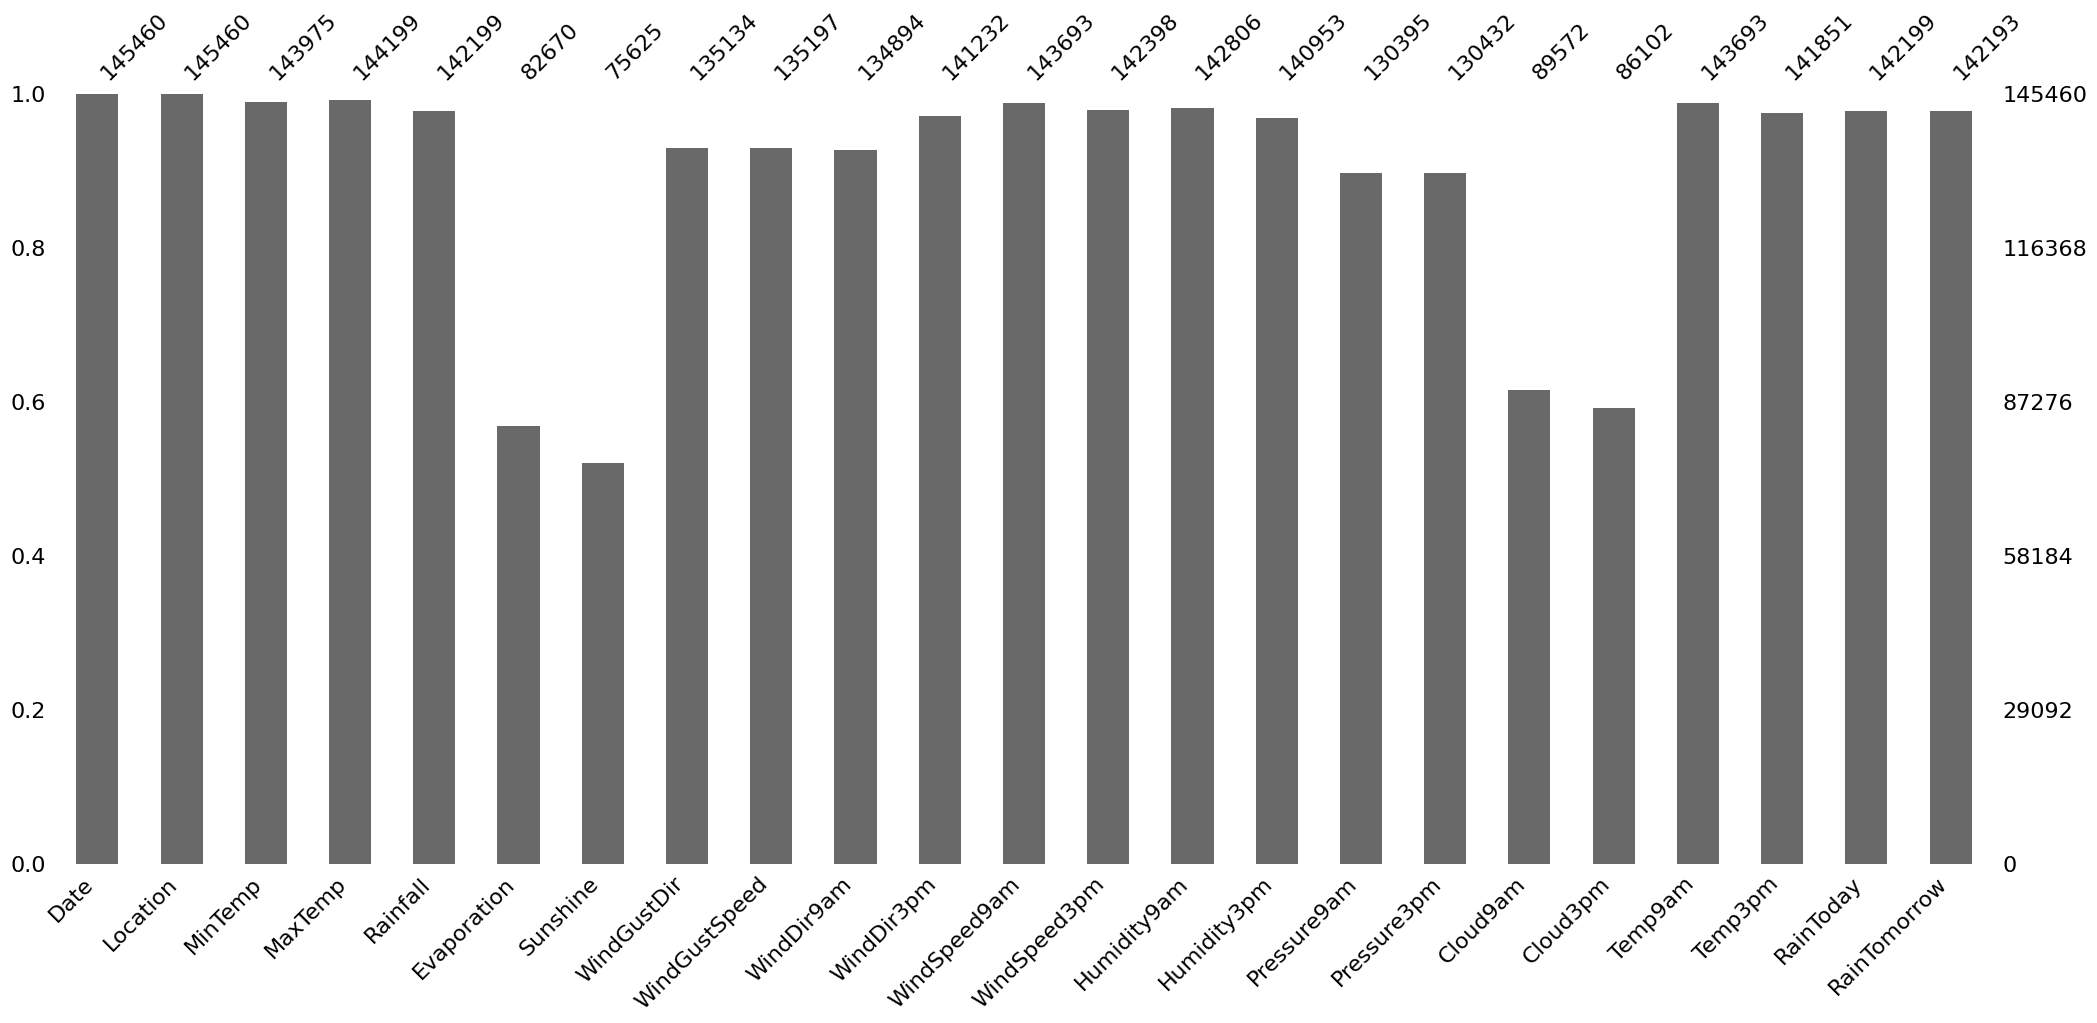

In [19]:
# Create a bar chart to visualise missing data in each column
msno.bar(rain_data)

In [20]:
# Calculating missing values percentage: dividing sum of missing values in each column by row count of the data set
missing_data_proportion = rain_data.isna().sum() / len(rain_data.index)
missing_data_proportion.sort_values()

Date            0.00
Location        0.00
MaxTemp         0.01
MinTemp         0.01
Temp9am         0.01
WindSpeed9am    0.01
Humidity9am     0.02
WindSpeed3pm    0.02
Rainfall        0.02
RainToday       0.02
RainTomorrow    0.02
Temp3pm         0.02
WindDir3pm      0.03
Humidity3pm     0.03
WindGustSpeed   0.07
WindGustDir     0.07
WindDir9am      0.07
Pressure3pm     0.10
Pressure9am     0.10
Cloud9am        0.38
Cloud3pm        0.41
Evaporation     0.43
Sunshine        0.48
dtype: float64

<span style="font-family:Cambria; color:#c27767">

### 3.3 Non-standard data format
</span>

<span style="font-family:Cambria">

It is helpful to make sure that each data set row corresponds to a single observational unit (in this case it's date-location pair), and single column corresponds to a single type of measurement. While I already know the latter is correct, I checked if any of the Date and Locations combination is duplicated, e.g. if two rows are present for weather in Adelaide on 2012-02-17. The result was no, therefore I can say the data is in tidy format.

</span>

In [21]:
rain_data.duplicated(subset=['Date', 'Location']).unique()

array([False])

<span style="font-family:Cambria; color:#c27767">

### 3.4 Messy column names
</span>

<span style="font-family:Cambria">

While this doesn't appear to be the issue in this data set, I need to keep in mind that it looks like feature names have been corrected before adding this data set into Kaggle. If I'm looking into most recent data, the column names appear different than ones in this data set. Therefore, amending column names might be required if I will try to run predictions on new data.

</span>

<span style="font-family:Cambria; color:#c27767">

### 3.5 Improper variable types
</span>

<span style="font-family:Cambria">

Each variable should have a proper data type - like I noticed earlier, <code>Date</code> is currently stored as object (or text) in our data frame, and both <code>RainToday</code> and <code>RainTomorrow</code> are objects and not binary data. Both are an easy fix however, because I have more difficult data types to decide about.

First of all, <strong>wind direction</strong>. At first, it might be seen as a categorical variable, however, I have an ability to calculate wind direction in degrees (so, numbers). All modeling algorithms work with numbers and do not understand words or 16 different 'categories', which are actually circular (so N  and S are as far away from each other as W and E, but NNE is almost the same direction as N). What is more dificult, is that N wind can be both 0 degree and 359 degree - which are two totally different numbers for a machine learning algorithm. To work around this, I have found out that sin and cos transformations are used to point the <em>direction</em> as a vector on x and y axis, saving the proper direction information and serving as a proper number to use in machine learning model. The issue was discussed many years ago in Cross Validated website: <a href="https://stats.stackexchange.com/questions/148380/use-of-circular-predictors-in-linear-regression" title="Cross Validated">Use of circular predictors in linear regression</a>. The same discussions appears for a few times regarding another circular variable - hours (<a href="https://stats.stackexchange.com/questions/245866/is-hour-of-day-a-categorical-variable?noredirect=1&lq=1" title="Cross Validated">Is hour of day a categorical variable?</a>, <a href="https://stats.stackexchange.com/questions/286590/adding-an-hour-feature-to-data?rq=1" title="Cross Validated">Adding an hour feature to data</a>, <a href="https://stats.stackexchange.com/questions/477991/linear-regression-with-hour-of-the-day?rq=1" title="Cross Validated">Linear regression with "hour of the day"</a>). First of all, degrees need to be converted to radians, and then $sin$ and $cos$ needs to be calculated. 

$$
sin(\frac{\pi\theta}{180}),cos(\frac{\pi\theta}{180})
$$

here $\theta$ means degrees.

The outcome of such calculation is a vector with $x$ and $y$ coordinates for each wind direction point. In this data set, that means 6 additional columns, where all of them meaningfully capture the data, and can be understandable to machine learning algorithms.

The second thing I am wondering about is <strong>locations</strong>. I can make them into numerical variables as well - using latitude and longitude data. The main reason is because some of the weather stations are very near each other, therefore I would assume they would have similar data patterns. Secondly, there are 49 different locations, which, coded into categorical variables, which algorithms cannot understand, and all of them are important in the weather reports. I wouldn't want to expand my data set with 48 new columns with one-hot encoding. So for now my judgement call is to convert weather station location into latitude / longitude code, use it for machine learning model and see how it works.

</span>

<span style="font-family:Cambria; color:#c27767">

### 3.6 Incomplete data
</span>

<span style="font-family:Cambria">

In proper data set, complete data means that every observational unit appears only once and there are no missing values. For example, I already checked that there are no duplicate values (same date and same location appearing twice), so this part is correct. But what about some missing date / location combos that I am not aware that they are missing? For example, it is possible that Sydney Airport doesn't have any data reported on 2012-05-17, while all other locations does have data for this day. I also keep in mind that no missing values are present in <code>Date</code> and <code>Location</code> variables, but that doesn't mean that no date / location rows are missing.

Since I noticed that data in data set is from 2007-11-01 to 2017-06-25 and we have 49 locations daily, the rows we should have are as follows: $3524 \times 49 = 172676$. While we have 145.460 data rows, that means we're missing 27.216 rows of data. I will try to visualise such data below:

</span>

In [22]:
# Function to calculate difference between two dates
from datetime import date

def days_between_dates_inclusive(date1, date2):
  # check which date is greater to avoid days output in -ve number
    if date2 > date1:   
        return (date2-date1).days + 1 # +1 as both given days should be included in the day count
    else:
        return (date1-date2).days + 1 # +1 as both given days should be included in the day count

date1 = date(2017, 6, 25)
date2 = date(2007, 11, 1)

print(f"There are {days_between_dates_inclusive(date1, date2)} days between {date1} and {date2}.")

There are 3525 days between 2017-06-25 and 2007-11-01.


In [23]:
# Calculate how many rows should I expect in the data set:
print(f"Expected number of rows in a data set: {days_between_dates_inclusive(date1, date2) * 49}")

Expected number of rows in a data set: 172725


In [24]:
# Calculate how many rows am I missing:
print(f"{145460 - 172725} expected rows are currently missing.")

-27265 expected rows are currently missing.


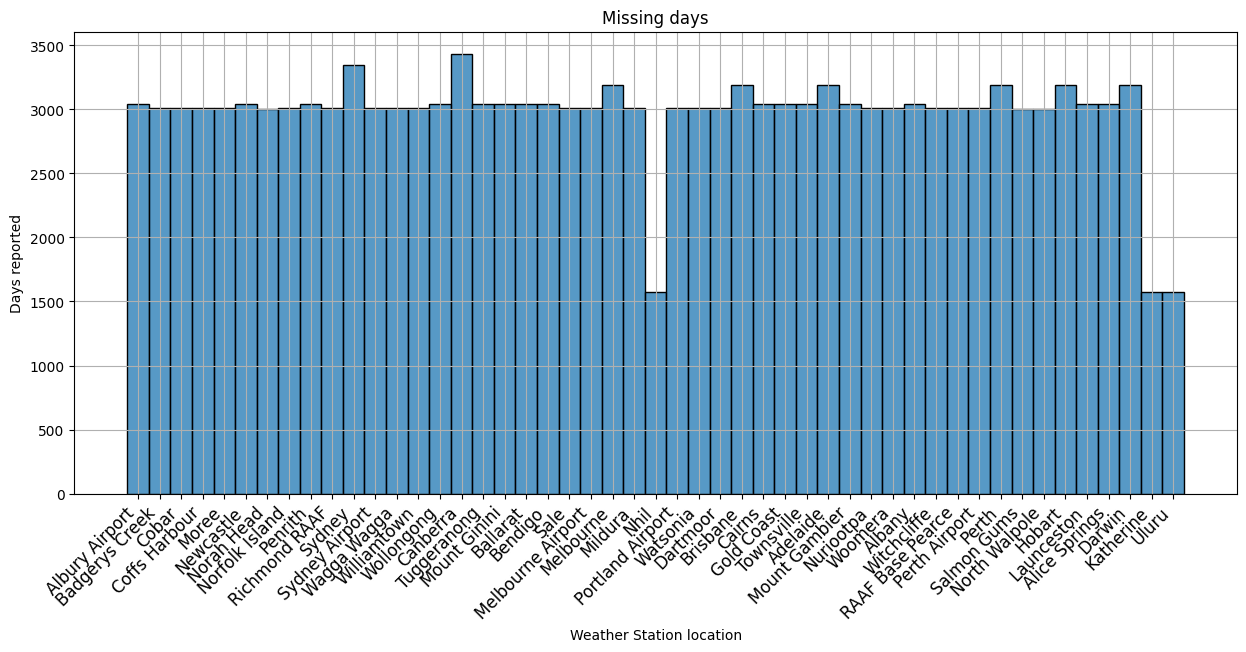

In [25]:
plt.figure(figsize=(15, 6))
sns.histplot(data=rain_data, x='Location')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title('Missing days')
plt.xlabel('Weather Station location')
plt.ylabel('Days reported')
plt.grid(True)
plt.show()

<span style="font-family:Cambria; color:#c27767">

## 4. Clean the Data
</span>

<span style="font-family:Cambria">

A function was created to run the data cleaning task for me using all the above checks and decisions. A judgement call has been made and for now I will remove two outliers in evaporation and wind speed columns, correct data type in each column, change wind direction from categorical variable to circular sin/cos transformation of direction degree (but keep the option to NOT do this as well), change location to latitude / longitude value (and keep an option to not convert this value), and I will add missing date / location rows to complete the data set.

I will call the function as <em>prepare</em> instead of <em>clean</em> because of data transformations I apply (wind direction and location).

</span>

In [26]:
# run the custom function to prepare data
rain_data_clean = prepare_rain_data(wind_direction_transformation = True, location_transformation = True)

In [27]:
rain_data_clean

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_x,WindGustDir_y,WindDir9am_x,WindDir9am_y,WindDir3pm_x,WindDir3pm_y,State,Latitude,Longitude
0,2007-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,New South Wales,-36.07,146.95
1,2007-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,New South Wales,-33.88,150.74
2,2007-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,New South Wales,-31.97,145.30
3,2007-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,New South Wales,-30.30,153.11
4,2007-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,New South Wales,-29.46,149.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172720,2017-06-25,1.80,12.80,0.00,NaN,NaN,50.00,15.00,17.00,84.00,73.00,NaN,NaN,8.00,8.00,9.40,12.40,False,False,0.71,-0.71,0.92,-0.38,0.92,-0.38,Tasmania,-41.43,147.14
172721,2017-06-25,9.60,NaN,0.00,NaN,NaN,NaN,6.00,17.00,36.00,19.00,"1,021.40","1,017.50",1.00,1.00,15.60,26.30,False,<NA>,NaN,NaN,-0.38,-0.92,0.00,1.00,Northern Territory,-23.70,133.88
172722,2017-06-25,19.30,NaN,0.00,5.00,NaN,NaN,13.00,17.00,68.00,45.00,"1,013.90","1,010.70",6.00,1.00,24.60,29.00,False,<NA>,NaN,NaN,0.00,1.00,0.92,-0.38,Northern Territory,-12.46,130.84
172723,2017-06-25,NaN,NaN,NaN,NaN,NaN,NaN,9.00,17.00,NaN,NaN,"1,014.90","1,011.70",NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,0.00,1.00,0.00,1.00,Northern Territory,-14.46,132.26


In [28]:
rain_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172725 entries, 0 to 172724
Data columns (total 28 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           172725 non-null  datetime64[ns]
 1   MinTemp        143975 non-null  float64       
 2   MaxTemp        144199 non-null  float64       
 3   Rainfall       142199 non-null  float64       
 4   Evaporation    82669 non-null   float64       
 5   Sunshine       75625 non-null   float64       
 6   WindGustSpeed  135197 non-null  float64       
 7   WindSpeed9am   143692 non-null  float64       
 8   WindSpeed3pm   142398 non-null  float64       
 9   Humidity9am    142806 non-null  float64       
 10  Humidity3pm    140953 non-null  float64       
 11  Pressure9am    130395 non-null  float64       
 12  Pressure3pm    130432 non-null  float64       
 13  Cloud9am       89572 non-null   float64       
 14  Cloud3pm       86102 non-null   float64       
 15  